In [1]:
from model import *
from util import *
from trainer import batch_generator

In [2]:
model = AutoEncoder_DNN2().cuda()
model.load_state_dict(torch.load("./param/besttime: 20180102_1519"))

In [3]:
image_array = load_image_npy("../data/image_cluster/image.npy")
test_case_df = load_test_case_csv("../data/image_cluster/test_case.csv")
mean = np.mean(image_array, axis=0)
std = np.std(image_array, axis=0, ddof=1)
image_array = (image_array - mean) / (std + 1e-6)

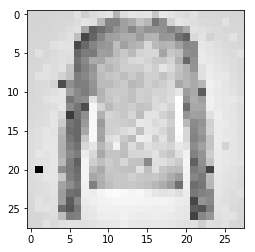

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(image_array[-16].reshape(28, 28), cmap='Greys')

In [32]:
reconstruct, code = model(Variable(torch.from_numpy(image_array[-16]).float()).cuda())

In [33]:
reconstruct = (reconstruct.cpu().data.numpy() * std + mean).reshape(28, 28)

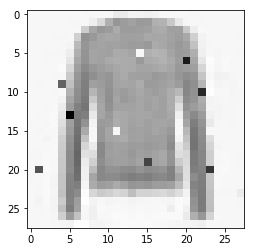

In [34]:
plt.imshow(reconstruct, cmap="Greys")


In [16]:
g = batch_generator(image_array, batch_size=300, shuffle=False, volatile=True)
reduced_image_array = []
for batch in tqdm(g):
    X_, code = model(batch["X"])
    reduced_image_array.append(code.cpu().data.numpy())

467it [00:01, 244.20it/s]


In [17]:
reduced_image_array = np.concatenate(reduced_image_array, axis=0)

In [18]:
reduced_image_array[0]

array([ 0.        ,  3.27692413,  1.37302613,  2.03436065,  2.15275264,
        1.91758955,  2.9863615 ,  0.        ,  1.70714307,  2.23754239,
        2.98123837,  0.        ,  2.30872583,  8.5885458 ,  0.64105695,
        3.09854126,  3.57094312,  0.        ,  2.14527988,  1.57168841,
        3.24806356,  1.27982354,  1.8829999 ,  2.60682774,  0.        ,
        4.0659256 ,  0.        ,  0.75243443,  4.64227486,  2.27493477,
        0.        ,  2.14216447], dtype=float32)

In [19]:
# K means
kmeans = KMeans(n_clusters=2).fit(reduced_image_array)

In [20]:
index2label = {index:label for index, label in enumerate(kmeans.labels_)}
ans = [None] * test_case_df.shape[0]
for index, row in enumerate(test_case_df.itertuples()):
    if index2label[row[2]] == index2label[row[3]]:
        ans[index] = 1
    else:
        ans[index] = 0


In [21]:
print_to_csv(ans, "testout_dnn_fix_initial_fix_forget_normalize_32dim_using_autoencoder")

In [36]:
np.sum(ans)

20166

In [38]:
# dump kmeans
pickle.dump(kmeans, open("./kmeans.pkl", "wb"))

In [13]:
reduced_image_array = TSNE(n_components=2, verbose=4, perplexity=40, 
                n_iter=500).fit_transform(reduced_image_array)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 140000 samples in 0.642s...
[t-SNE] Computed neighbors for 140000 samples in 1200.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 140000
[t-SNE] Computed conditional probabilities for sample 2000 / 140000
[t-SNE] Computed conditional probabilities for sample 3000 / 140000
[t-SNE] Computed conditional probabilities for sample 4000 / 140000
[t-SNE] Computed conditional probabilities for sample 5000 / 140000
[t-SNE] Computed conditional probabilities for sample 6000 / 140000
[t-SNE] Computed conditional probabilities for sample 7000 / 140000
[t-SNE] Computed conditional probabilities for sample 8000 / 140000
[t-SNE] Computed conditional probabilities for sample 9000 / 140000
[t-SNE] Computed conditional probabilities for sample 10000 / 140000
[t-SNE] Computed conditional probabilities for sample 11000 / 140000
[t-SNE] Computed conditional probabilities for sample 12000 / 140000
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 122000 / 140000
[t-SNE] Computed conditional probabilities for sample 123000 / 140000
[t-SNE] Computed conditional probabilities for sample 124000 / 140000
[t-SNE] Computed conditional probabilities for sample 125000 / 140000
[t-SNE] Computed conditional probabilities for sample 126000 / 140000
[t-SNE] Computed conditional probabilities for sample 127000 / 140000
[t-SNE] Computed conditional probabilities for sample 128000 / 140000
[t-SNE] Computed conditional probabilities for sample 129000 / 140000
[t-SNE] Computed conditional probabilities for sample 130000 / 140000
[t-SNE] Computed conditional probabilities for sample 131000 / 140000
[t-SNE] Computed conditional probabilities for sample 132000 / 140000
[t-SNE] Computed conditional probabilities for sample 133000 / 140000
[t-SNE] Computed conditional probabilities for sample 134000 / 140000
[t-SNE] Computed conditional probabilities for sample 135000 / 140000
[t-SNE] Computed con

In [15]:
kmeans = KMeans(n_clusters=2).fit(reduced_image_array)


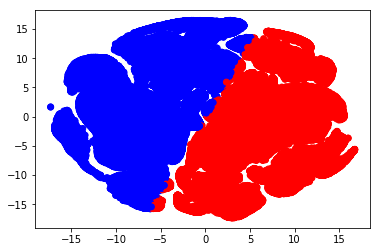

In [16]:
color = ["blue", "red"]
color_list = [color[label] for label in kmeans.labels_]
plt.scatter(reduced_image_array[:, 0], reduced_image_array[:, 1], c=color_list, cmap=plt.cm.get_cmap("jet", 10))
plt.show()

In [54]:
index2label = {index:label for index, label in enumerate(kmeans.labels_)}
ans = [None] * test_case_df.shape[0]
for index, row in enumerate(test_case_df.itertuples()):
    if index2label[row[2]] == index2label[row[3]]:
        ans[index] = 1
    else:
        ans[index] = 0

Pandas(Index=0, ID=0, image1_index=17874, image2_index=20452)


In [27]:
print_to_csv(ans, "testout_32dim_using_autoencoder_and_use_tsne_reduce_to2dim_and_kmeans")

In [33]:
np.sum(ans) / np.sum(np.array(ans) == 0)

0.050200651973051215

1